# Доверительные интервалы для доли 

## Генерация данных

In [1]:
import numpy as np

In [2]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

In [3]:
#истинное значение доли
statistical_population.mean()

0.49771

## Точечная оценка доли

In [4]:
random_sample.mean()

0.502

## Доверительный интервал для доли

In [5]:
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [6]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [7]:
print 'normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0])

normal_interval [0.471010, 0.532990] with width 0.061979


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [8]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

In [9]:
print 'wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0])

wilson_interval [0.471062, 0.532922] with width 0.061860


## Размер выборки для интервала заданной ширины

In [10]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [11]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

9604

In [12]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [13]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [14]:
print 'normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0])

normal_interval [0.481776, 0.501773] with width 0.019997


In [38]:
interval = proportion_confint(1, 50, method = 'normal', alpha=0.05)
print '[%f, %f] with width %f' % (interval[0],
                                                  interval[1],
                                                  interval[1] - interval[0])

[0.000000, 0.058805] with width 0.058805


In [32]:
p=np.arange(0,1,0.01)
n=(p*(1-p))/(0.01/1.959963985)**2

In [36]:
import matplotlib.pyplot as plt

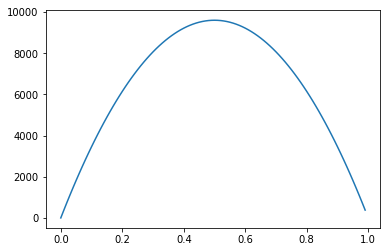

In [37]:
plt.plot(p, n)

In [41]:
def my_proportion_confint(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = stat.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

In [42]:
interval = my_proportion_confint(1, 50, method = 'normal', alpha=0.05)
print '[%f, %f] with width %f' % (interval[0],
                                                  interval[1],
                                                  interval[1] - interval[0])

NameError: global name 'stat' is not defined

In [132]:
n1=11037.
n2=11034.
a1=104.
a2=189.

In [133]:
p1=a1/n1
p2=a2/n2

In [134]:
p1

0.009422850412249705

In [135]:
p2-p1

0.0077060239760047815

In [59]:
odds(p1)

0.009512485136741973

In [60]:
odds(p2)

0.017427385892116183

In [63]:
odds(p2)/odds(p1)

1.8320539419087138

In [141]:
np.random.seed(0)

In [113]:
def get_v(K, N):
    return(np.array([1]*K+[0]*(N-K)))

In [115]:
def v_p(v):
    return(sum(v)/float(len(v)))

In [149]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = sp.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [58]:
def odds(p):
    return(p/(1-p))

In [81]:
def odd_prop(odd1, odd2):
    return odd2/odd1

In [64]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [138]:
v1=get_v(104, 11037)
v2=get_v(189, 11034)
p1=v_p(v1)
p2=v_p(v2)

In [152]:
p2-p1

0.0077060239760047815

In [151]:
proportions_confint_diff_ind(v2, v1, 0.05)

(0.004687750675049439, 0.010724297276960124)

In [158]:
odd_prop(odds(v_p(v1)), odds(v_p(v2)))

1.8320539419087138

In [161]:
np.random.seed(0)
stat=map(lambda x: odd_prop(odds(v_p(x[0])), odds(v_p(x[1]))), zip(get_bootstrap_samples(v1, 1000), get_bootstrap_samples(v2, 1000)))

In [162]:
stat_intervals(stat, 0.05)

array([1.44419465, 2.34321168])